### Pacotes Necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.set_style('whitegrid')

### Funções

In [2]:
##---------------------------------------------------------------------------------------------------- 
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna
def descr_column(data, column, count = True):
    print(f'Coluna avaliada: ', column)
    print('O número de registros nesse df é: ', data.shape[0])
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nPorcentagem de valores nulos: {round((data[column].isnull().sum()/data.shape[0])* 100,2)} %')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')


##----------------------------------------------------------------------------------------------------    
## Cria uma tabela de frequências de uma variável em relação à variável resposta
## e depois contrói o gráfico de barras
def freq_var(df, colunas, col_dic, var_resp_dic):
    ## Copiando o df original
    tab_freq = df.copy()

    tab_freq = tab_freq[colunas]

    ## Renomeando as categorias das colunas
    tab_freq[colunas[0]]= tab_freq[colunas[0]].replace(col_dic)

    tab_freq[colunas[1]]= tab_freq[colunas[1]].replace(var_resp_dic)


    ## Construindo a tabela de frequências
    tab_freq = tab_freq[[colunas[0], colunas[1]]].groupby(colunas[0]).value_counts()

    ## Separando os dados como contagem para fazer o gráfico
    tab_graph = tab_freq.copy()
    tab_graph = tab_graph.reset_index()

    ## Considerando os dados não nulos na variável resposta
    ## o total de passageiros com valores não nulos 
    total_passageiros = df[df.notnull()[colunas[1]]].shape[0]
    tab_freq = round((tab_freq/total_passageiros)*100,2)

    sns.barplot(data = tab_graph, y = 'count', x = colunas[0], hue = colunas[1],palette='Blues_r')

    return(tab_freq)

### Carregando os dados

In [3]:
train_df = pd.read_csv('C:/Users/clari/OneDrive/Documentos/python_codigos/titanic_project/data/train.csv')
# train_df = pd.read_csv(r'./data/train.csv')
## Criando uma coluna que identifique se o dado pertence ao treino ou test
train_df['Df'] = 'train'
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [4]:
test_df = pd.read_csv('C:/Users/clari/OneDrive/Documentos/python_codigos/titanic_project/data/test.csv')
# train_df = pd.read_csv(r'./data/test.csv')

## Criando uma coluna que identifique se o dado pertence ao treino ou test
test_df['Df'] = 'test'
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


In [5]:
# Criando um df único com treino e teste para análise
titanic_df = pd.concat([train_df,test_df], ignore_index=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


### Survived - Target Variable

In [6]:
## Avaliando a variável resposta
descr_column(titanic_df, 'Survived')
## A coluna Survived possui nulos em todos os dados de teste

Coluna avaliada:  Survived
O número de registros nesse df é:  1309
Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Porcentagem de valores nulos: 31.93 %

Quantidade por opção: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


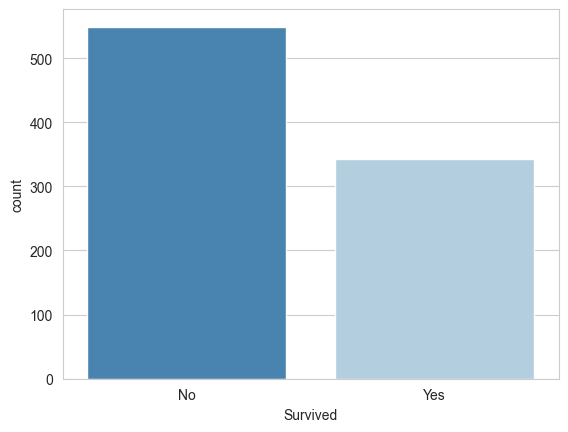

In [7]:
### Analisando a variável target
var_resp_dic = {0:"No",
                1:"Yes"}
tab_graph = titanic_df.copy()
tab_graph['Survived']= tab_graph['Survived'].replace(var_resp_dic)
sns.countplot(data = tab_graph, x = 'Survived',palette='Blues_r')

## Deletando temporários
del tab_graph

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


### Pclass

In [9]:
## Avaliando a Pclass
descr_column(titanic_df, 'Pclass')

Coluna avaliada:  Pclass
O número de registros nesse df é:  1309
Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Porcentagem de valores nulos: 0.0 %

Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


Pclass        Survived
First_Class   Yes         15.26
              No           8.98
Second_Class  No          10.89
              Yes          9.76
Third_Class   No          41.75
              Yes         13.36
Name: count, dtype: float64

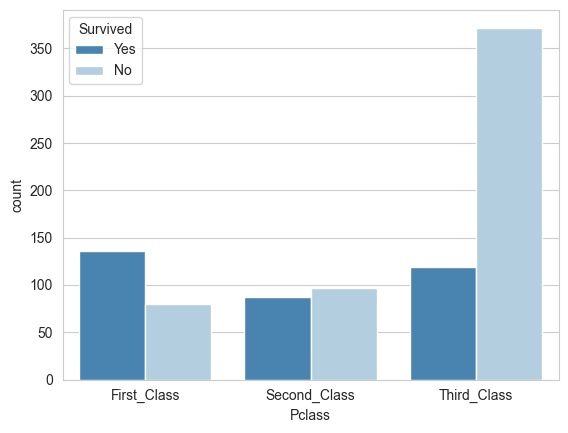

In [10]:
## Selecionando as colunas a serem avaliadas
colunas = ['Pclass','Survived']

col_dic = {1:"First_Class",
            2:"Second_Class",
            3:"Third_Class"}
var_resp_dic = {0:"No",
                1:"Yes"}

freq_var(titanic_df, colunas, col_dic, var_resp_dic)

Apenas a primeira classe apresentou um número maior de sobreviventes do que não sobreviventes comparando o total de passageiros da mesma classe. A terceira classe apresenta o maior índice de mortes.

### Sex

In [11]:
## Avaliando a Sex
descr_column(titanic_df, 'Sex')

Coluna avaliada:  Sex
O número de registros nesse df é:  1309
Quantidade de valores únicos: 2

Quais são os valores únicos: ['male' 'female']

Quantidade de valores nulos: 0

Porcentagem de valores nulos: 0.0 %

Quantidade por opção: 
Sex
male      843
female    466
Name: count, dtype: int64


Sex     Survived
female  Yes         26.15
        No           9.09
male    No          52.53
        Yes         12.23
Name: count, dtype: float64

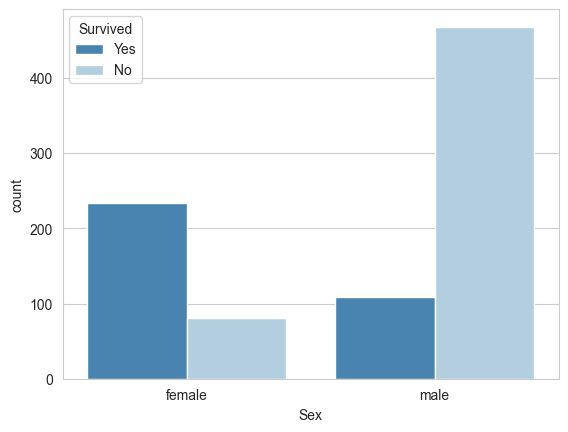

In [12]:
## Selecionando as colunas a serem avaliadas
colunas = ['Sex','Survived']

col_dic = {'male':'male',
            'female':"female"}

freq_var(titanic_df, colunas, col_dic, var_resp_dic)

O gráfico acima demonstra que as mulheres sobreviveram mais do que os homens, assim a variável Sex pode ser usada para explicar a variável Survived no modelo. As variáveis Pclass e Sex não possuem valores nulos. Portanto, podem ser utilizadas sem que haja um pré-tratamento.

### Age

In [13]:
## Avaliando a Age
descr_column(titanic_df, 'Age')

Coluna avaliada:  Age
O número de registros nesse df é:  1309
Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Porcentagem de valores nulos: 20.09 %

Quantidade por opção: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


A variável Age possui alguns valores ausentes (em torno de 20%). Para contornar esse problema uma opção é transformar a variável quantitativa Age em variável categórica Faixa Etária considerando o título do passageiro (Mister, Miss, Master) em categorias nos casos de valores ausentes.

In [14]:
### Extraindo o título do nome do passageiro
titanic_df['Title'] = titanic_df['Name'].str.split('.').str[0]
titanic_df['Title'] = titanic_df['Title'].str.split(',').str[1]
titanic_df['Title'] = titanic_df['Title'].str.strip()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [15]:
titanic_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [16]:
## Avaliando a Title
descr_column(titanic_df, 'Title')

Coluna avaliada:  Title
O número de registros nesse df é:  1309
Quantidade de valores únicos: 18

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

Quantidade de valores nulos: 0

Porcentagem de valores nulos: 0.0 %

Quantidade por opção: 
Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


In [17]:
## Copiando o df original
tab_freq = titanic_df.copy()
colunas = ['Age', 'Title']
tab_freq = tab_freq[colunas]

## Verificando idade mínima e máxima por pronome de tratamento
tab_freq=tab_freq.groupby(['Title'], as_index=False)
tab_freq = tab_freq.agg(Min_Age = ("Age",'min'),
                        Max_Age = ("Age",'max'))
tab_freq.head(20)

,Title,Min_Age,Max_Age
0,Capt,70.00,70.0
1,Col,47.00,60.0
2,Don,40.00,40.0
3,Dona,39.00,39.0
4,Dr,23.00,54.0
5,Jonkheer,38.00,38.0
6,Lady,48.00,48.0
7,Major,45.00,52.0
8,Master,0.33,14.5
9,Miss,0.17,63.0


In [18]:
### Selecionando os casos de Age nulo
print('Selecionando apenas os casos de Age nulo')
null_age = titanic_df[titanic_df['Age'].isnull()]
print('Dentre os casos de Age nulo há ', null_age.Title.isnull().sum(), ' dados nulos em Title')
print('Os Title correspondentes são: ',null_age.Title.unique())

Selecionando apenas os casos de Age nulo
Dentre os casos de Age nulo há  0  dados nulos em Title
Os Title correspondentes são:  ['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


Como o Title Miss teve uma idade mínima de 0.17 ( ou seja, um bebê) e máxima 63 anos, não é possível inferir a faixa etária do passageiro pelo título que ele recebe.
Uma segunda estratégia talvez seja pela média de idade por classe, uma vez que a variável Pclass não possui dados nulos.

In [19]:
## Copiando o df original
tab_freq = titanic_df.copy()
colunas = ['Age', 'Pclass']
tab_freq = tab_freq[colunas]

col_dic = {1:"First_Class",
            2:"Second_Class",
            3:"Third_Class"}

## Renomeando as categorias das colunas
tab_freq[colunas[1]]= tab_freq[colunas[1]].replace(col_dic)  

## Verificando idade mínima e máxima por pronome de tratamento
tab_freq=tab_freq.groupby(['Pclass'], as_index=False)
tab_freq = tab_freq.agg(Mean_Age = ("Age",'mean'))
## Arredondando para inteiro
tab_freq['Mean_Age'] = round(tab_freq['Mean_Age'])
tab_freq.head(20)

,Pclass,Mean_Age
0,First_Class,39.0
1,Second_Class,30.0
2,Third_Class,25.0


In [20]:
### Preenchendo valores de Age nulos com a média de idade por classe
conditionlist = [
    (titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == 1),
    (titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == 2),
    (titanic_df['Age'].isnull()) & (titanic_df['Pclass'] == 3)]
choicelist = [round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0), 
              round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0),
              round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)]
titanic_df['Age_treated'] = np.select(conditionlist, choicelist, default=titanic_df['Age'])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,35.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,35.0


In [21]:
## Visualizando como foi feito o preenchimento de dados nulos
titanic_df[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train,Mr,25.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train,Mr,30.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train,Mrs,25.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train,Mr,25.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train,Miss,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test,Miss,25.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test,Miss,25.0
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test,Mr,25.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test,Mr,25.0


In [22]:
## A idade sempre será do tipo int, porém no conjunto de dados ela aparece como float
## Corrigindo o tipo de dados
titanic_df['Age_treated'] = np.floor(pd.to_numeric(titanic_df['Age_treated'], errors='coerce')).astype('Int64')

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,22
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,38
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,26
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,35
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,35


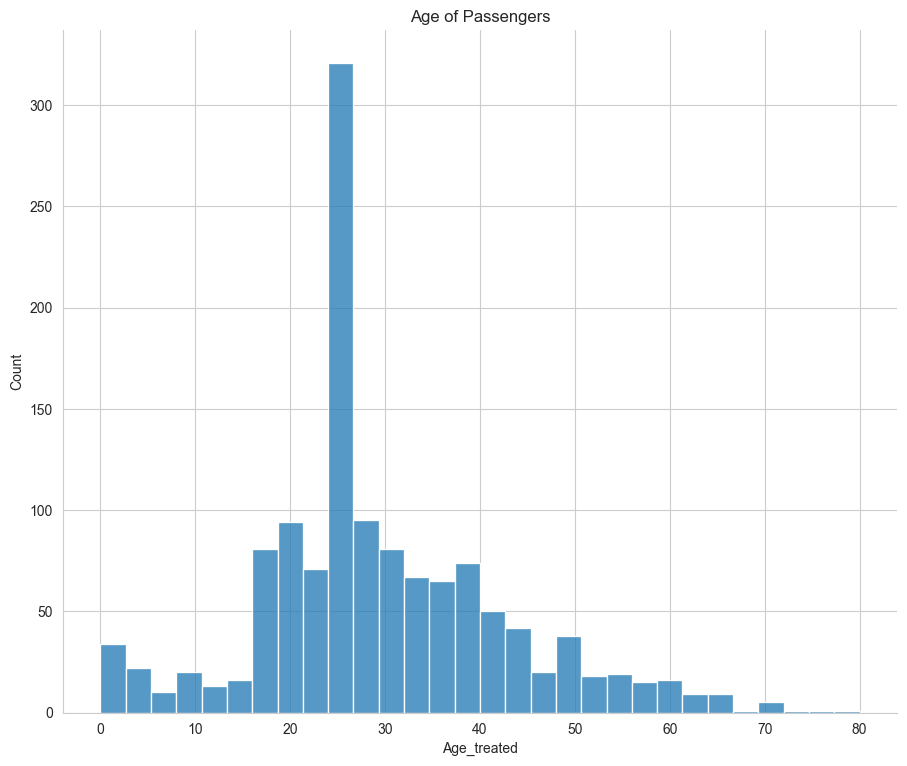

In [24]:
### Histograma da variável
ax = sns.displot(titanic_df.Age_treated, kde= False)
column = 'Age_treated'
title_graph = 'Age of Passengers'
ax.set(xlabel= column, title= title_graph)
ax.figure.set_size_inches(10,8)

A grande maioria dos passageiros eram adultos (na faixa de 20 até 40 anos de idade). A distribuição das idades não aparenta ser simétrica.
Apesar da variável Title não ter ajudado no range de idade dos passageiros, ela pode ser útil na explicação da variável target pois viu-se que a maioria dos sobreviventes eram mulheres. A variável Title tem porém algo a ser modificado: um grande número de títulos com poucas observações, de forma que optou-se por manter os títulos Mr, Miss, Mrs, Master que posssui um maior número de observações, os demais serão agrupados na categoria Person.

In [25]:
### Retirando categorias com poucas observações na variável Title
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]
titanic_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

### SibSp

In [26]:
## Avaliando a SibSp
descr_column(titanic_df, 'SibSp')

Coluna avaliada:  SibSp
O número de registros nesse df é:  1309
Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Porcentagem de valores nulos: 0.0 %

Quantidade por opção: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


SibSp  Survived
0      No          44.67
       Yes         23.57
1      Yes         12.57
       No          10.89
2      No           1.68
       Yes          1.46
3      No           1.35
       Yes          0.45
4      No           1.68
       Yes          0.34
5      No           0.56
8      No           0.79
Name: count, dtype: float64

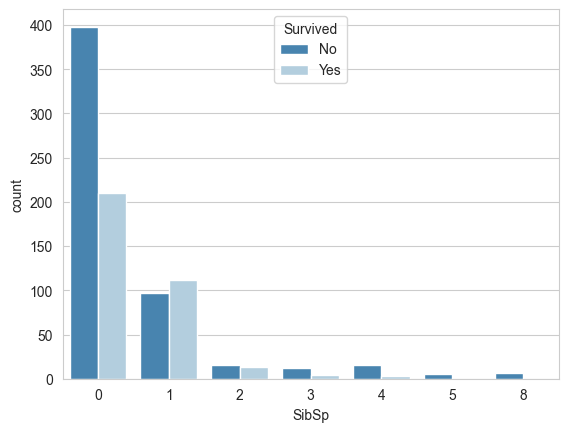

In [27]:
## Selecionando as colunas a serem avaliadas
colunas = ['SibSp','Survived']

col_dic = {}

freq_var(titanic_df, colunas, col_dic, var_resp_dic)

A coluna SibSp não possui valores ausentes. Logo, pode ser usada sem a necessidade de um pré-tratamento.

### Parch

In [28]:
## Avaliando a Parch
descr_column(titanic_df, 'Parch')

Coluna avaliada:  Parch
O número de registros nesse df é:  1309
Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Porcentagem de valores nulos: 0.0 %

Quantidade por opção: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


A coluna Parch não possui valores ausentes. Logo, pode ser usada sem a necessidade de um pré-tratamento.

Parch  Survived
0      No          49.94
       Yes         26.15
1      Yes          7.30
       No           5.95
2      No           4.49
       Yes          4.49
3      Yes          0.34
       No           0.22
4      No           0.45
5      No           0.45
       Yes          0.11
6      No           0.11
Name: count, dtype: float64

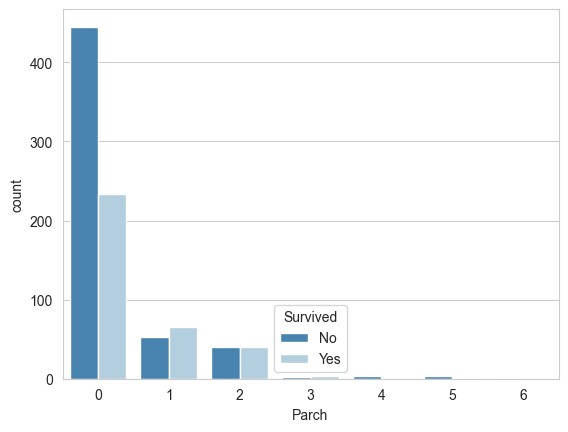

In [29]:
## Selecionando as colunas a serem avaliadas
colunas = ['Parch','Survived']

col_dic = {}

freq_var(titanic_df, colunas, col_dic, var_resp_dic)

As colunas Ticket e Cabin trazem a identificação do passagem e da cabine do passageiro. Essas informações não serão utilizadas na contrução do modelo.

### Embarked

In [30]:
## Avaliando a Embarked
descr_column(titanic_df, 'Embarked')

Coluna avaliada:  Embarked
O número de registros nesse df é:  1309
Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Porcentagem de valores nulos: 0.15 %

Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


In [31]:
## Visualizando os dados nulos da coluna Embarked
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train,Miss,38
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train,Mrs,62


Como a maioria dos passageiros embarcou no portão S (914) em comparação com outros portões, optou-se por preencher esses dados nulos com o portãp S.

In [32]:
## Copiando a coluna para manter valores originais do df
titanic_df['Embarked_treated'] = titanic_df['Embarked']
titanic_df['Embarked_treated'].fillna('S', inplace = True)
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated,Embarked_treated
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train,Miss,38,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train,Mrs,62,S


Embarked_treated  Survived
C                 Yes         10.44
                  No           8.42
Q                 No           5.27
                  Yes          3.37
S                 No          47.92
                  Yes         24.58
Name: count, dtype: float64

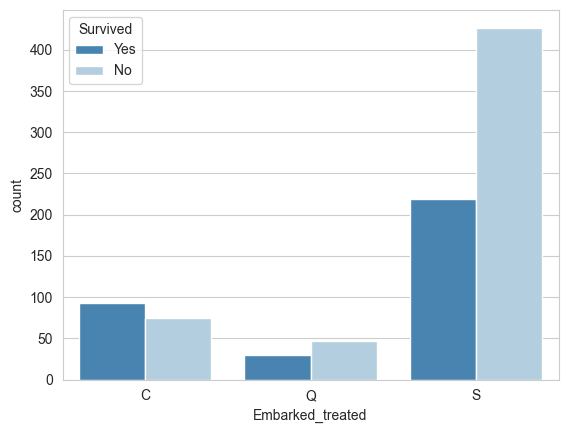

In [33]:
## Selecionando as colunas a serem avaliadas
colunas = ['Embarked_treated','Survived']

col_dic = {}
var_resp_dic = {0:"No",
                1:"Yes"}

freq_var(titanic_df, colunas, col_dic, var_resp_dic)

In [34]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated,Embarked_treated
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test,Mr,25,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,Person,39,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,Mr,38,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test,Mr,25,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test,Master,25,C


### Fare

In [35]:
## Avaliando a Fare
descr_column(titanic_df, 'Fare')

Coluna avaliada:  Fare
O número de registros nesse df é:  1309
Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55

In [36]:
titanic_df[titanic_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated,Embarked_treated
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test,Mr,60,S


Há apenas um dado nulo na coluna Fare que corresponde a um passageiro de 3a classe. Como sabe-se o valor pago pela passagem está diretamente relacionado à classe. Portanto, preenche-se o valor da tarifa pela média dos valores pagos em bilhetes de 3a classe.

In [37]:
### Copiando os valores da coluna para manter os valores originais do df
titanic_df['Fare_treated'] = titanic_df['Fare']
titanic_df['Fare_treated'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare_treated'].mean(), inplace = True)
titanic_df[titanic_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Df,Title,Age_treated,Embarked_treated,Fare_treated
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test,Mr,60,S,13.302889


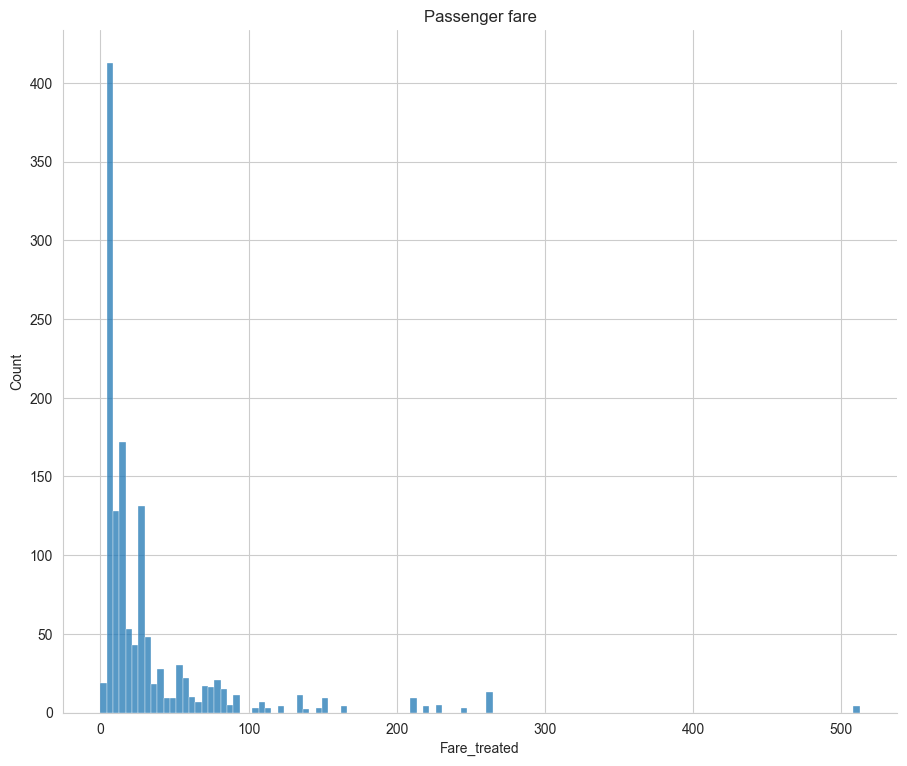

In [38]:
### Histograma da variável
ax = sns.displot(titanic_df.Fare_treated, kde= False)
column = 'Fare_treated'
title_graph = 'Passenger fare'
ax.set(xlabel= column, title= title_graph)
ax.figure.set_size_inches(10,8)

In [62]:
### Selecionando as variáveis que serão utilizadas na análise
df = titanic_df.copy()

df = df[['Survived', 
        'Pclass', 
        'Sex', 
        'Age_treated', 
        'SibSp', 
        'Parch',
        'Fare_treated',
        'Embarked_treated',
        'Title',
        'Df']]

## Transformando a variável categóricas em  dummies
df['Sex'] = df['Sex'].replace(['female', 'male'], [1, 0])
pclass = pd.get_dummies(df['Pclass'], prefix = "Pclass", drop_first = True)
title = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df['Embarked_treated'], prefix = 'Embarked', drop_first = True)

df_model = pd.concat([df, pclass, title, embarked], axis = 1)

## Deletando temporários
del df
df_model.drop(['Pclass', 'Embarked_treated', 'Title'],axis='columns', inplace=True)

## Separando treino e teste
titanic_train = df_model.copy()
titanic_train = df_model.query('Df == "train"')


titanic_test = df_model.copy()
titanic_test = df_model.query('Df == "test"')


## Selecionando colunas
titanic_train = titanic_train[['Survived', 
                               'Age_treated',
                               'SibSp',
                               'Parch',
                               'Fare_treated',
                               'Sex',
                               'Pclass_2',
                               'Pclass_3',
                               'Title_Miss',
                               'Title_Mr',
                               'Title_Mrs',
                               'Title_Person',
                               'Embarked_Q',
                               'Embarked_S']]

titanic_test = titanic_test[['Age_treated',
                               'SibSp',
                               'Parch',
                               'Fare_treated',
                               'Sex',
                               'Pclass_2',
                               'Pclass_3',
                               'Title_Miss',
                               'Title_Mr',
                               'Title_Mrs',
                               'Title_Person',
                               'Embarked_Q',
                               'Embarked_S']]

### Corrigindo tipos de valores nas variáveis
titanic_train['Survived'] = titanic_train['Survived'].astype(int)

## Deletando temporarios
del df_model

titanic_train.head()

,Survived,Age_treated,SibSp,Parch,Fare_treated,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,22,1,0,7.2500,0,False,True,False,True,False,False,False,True
1,1,38,1,0,71.2833,1,False,False,False,False,True,False,False,False
2,1,26,0,0,7.9250,1,False,True,True,False,False,False,False,True
3,1,35,1,0,53.1000,1,False,False,False,False,True,False,False,True
4,0,35,0,0,8.0500,0,False,True,False,True,False,False,False,True


In [58]:
titanic_test.head()

,Age_treated,SibSp,Parch,Fare_treated,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
891,34,0,0,7.8292,0,False,True,False,True,False,False,True,False
892,47,1,0,7.0000,1,False,True,False,False,True,False,False,True
893,62,0,0,9.6875,0,True,False,False,True,False,False,True,False
894,27,0,0,8.6625,0,False,True,False,True,False,False,False,True
895,22,1,1,12.2875,1,False,True,False,False,True,False,False,True


<Axes: >

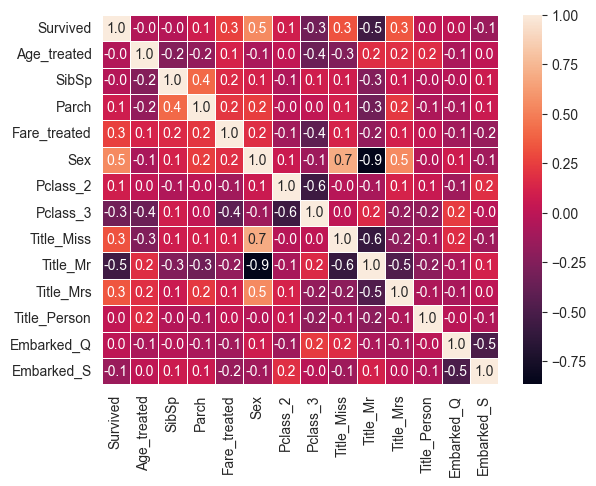

In [63]:
### Avaliando a correlação entre as variáveis
correlation = titanic_train.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

As variáveis Title e Sex são altamente correlacionadas, o que pode prejudicar a eficiência do modelo. Ocorre que variáveis correlacionadas acabam sendo redundantes para um modelo de machine learning. A premissa é que as variáveis redundantes podem ser removidas sem a perda de informação/valor para o modelo, resultando em um modelo mais simples e parcimonioso.

In [64]:
## Selecionando colunas
titanic_train = titanic_train[['Survived', 
                               'Age_treated',
                               'SibSp',
                               'Parch',
                               'Fare_treated',
                               'Sex',
                               'Pclass_2',
                               'Pclass_3',
                               'Embarked_Q',
                               'Embarked_S']]

titanic_test = titanic_test[['Age_treated',
                               'SibSp',
                               'Parch',
                               'Fare_treated',
                               'Sex',
                               'Pclass_2',
                               'Pclass_3',
                               'Embarked_Q',
                               'Embarked_S']]
titanic_train.head()

,Survived,Age_treated,SibSp,Parch,Fare_treated,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22,1,0,7.2500,0,False,True,False,True
1,1,38,1,0,71.2833,1,False,False,False,False
2,1,26,0,0,7.9250,1,False,True,False,True
3,1,35,1,0,53.1000,1,False,False,False,True
4,0,35,0,0,8.0500,0,False,True,False,True


<Axes: >

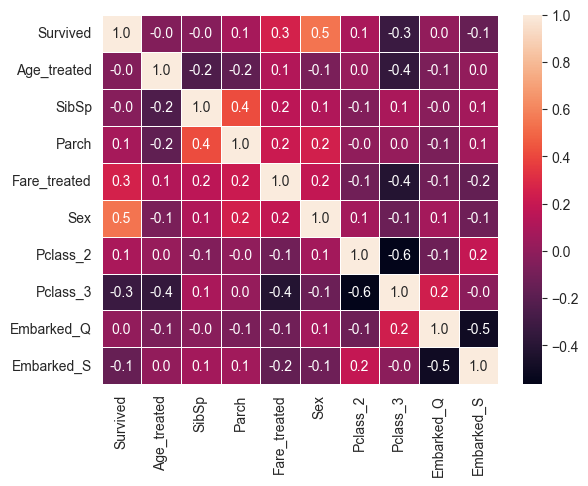

In [65]:
### Avaliando a correlação entre as variáveis
correlation = titanic_train.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Agora as variáveis restantes possuem certa correlação, mas nada que pudesse ser considerado como redundante. Finalizamos assim o conjunto de variáveis usadas no modelo de classificação

In [66]:
### Salvando os conjuntos de dados
titanic_train.to_csv('C:/Users/clari/OneDrive/Documentos/python_codigos/titanic_project/data/titanic_train.csv')
titanic_test.to_csv('C:/Users/clari/OneDrive/Documentos/python_codigos/titanic_project/data/titanic_test.csv')